           age        ch4      d18O        dD
0        950.0   9.003690  0.170383  5.478859
1       1050.0   9.410949  0.174331  5.486854
2       1150.0   9.791873  0.229537  4.417738
3       1250.0   9.854893  0.244799  4.411961
4       1350.0  10.389633  0.244646  4.350302
...        ...        ...       ...       ...
6390  639950.0   0.641453  0.410196  0.321709
6391  640050.0   0.628370  0.333975  0.292614
6392  640150.0   0.876800  0.277661  0.263385
6393  640250.0   1.051162  0.174972  0.234296
6394  640350.0   1.183399  0.178824  0.205687

[6395 rows x 4 columns]
           age       pre
0        950.0  0.017104
1       1050.0  0.017116
2       1150.0  0.017109
3       1250.0  0.017085
4       1350.0  0.017045
...        ...       ...
6390  639950.0 -0.001522
6391  640050.0 -0.001830
6392  640150.0 -0.002134
6393  640250.0 -0.002433
6394  640350.0 -0.002727

[6395 rows x 2 columns]
           age       obl
0        950.0  0.411129
1       1050.0  0.411353
2       1150.0  0.41157

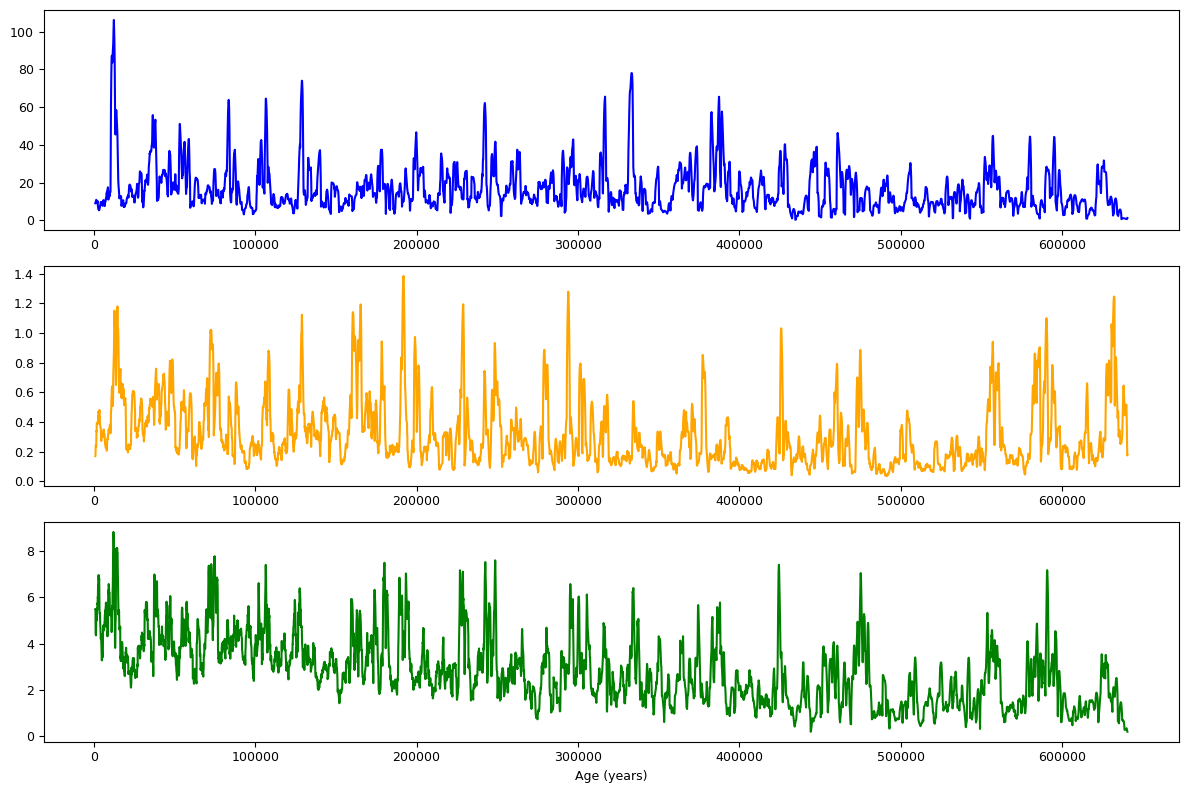

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

file_path = r'D:\VScode\bipolar_seesaw_CCM\other_data\MMV_Thirumalai_2020.xlsx'
df = pd.read_excel(file_path)
df.columns = ['age', 'ch4', 'd18O', 'dD']

# age =age *1000
df['age'] = df['age'].abs() * 1000


pre_path = r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt"
obl_path = r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_800_inter100.txt"
df_pre_raw = pd.read_csv(pre_path, sep=r'\s+', header=None, engine='python')
df_obl_raw = pd.read_csv(obl_path, sep=r'\s+', header=None, engine='python')

# convert to years & ensure age increasing
df_pre_raw.iloc[:,0] = df_pre_raw.iloc[:,0].abs() * 1000
df_obl_raw.iloc[:,0] = df_obl_raw.iloc[:,0].abs() * 1000
df_pre_raw = df_pre_raw.iloc[::-1].reset_index(drop=True)
df_obl_raw = df_obl_raw.iloc[::-1].reset_index(drop=True)
df_pre_raw.columns = ['age','pre']
df_obl_raw.columns = ['age','obl']



# 3) create unified age vector
new_age = df['age'].values


def interp(df, col):
    f = interp1d(df['age'], df[col],
                    kind='nearest',
                    bounds_error=False,
                    fill_value="extrapolate")
    return f(new_age)


df_pre = pd.DataFrame({'age': new_age,
                            'pre': interp(df_pre_raw, 'pre')})
df_obl = pd.DataFrame({'age': new_age,
                            'obl': interp(df_obl_raw, 'obl')})

print(df)
print(df_pre)
print(df_obl)


# creat dfs
df_ch4 = pd.DataFrame({'age': new_age,
                       'ch4': df['ch4'].values})
df_d18O = pd.DataFrame({'age': new_age,
                        'd18O': df['d18O'].values})
df_dD = pd.DataFrame({'age': new_age,
                       'dD': df['dD'].values})


# plot all data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_ch4['age'], df_ch4['ch4'], label='CH4', color='blue')
plt.subplot(3, 1, 2)
plt.plot(df_d18O['age'], df_d18O['d18O'], label='d18O', color='orange')

plt.subplot(3, 1, 3)
plt.plot(df_dD['age'], df_dD['dD'], label='dD', color='green')
plt.xlabel('Age (years)')
plt.tight_layout()


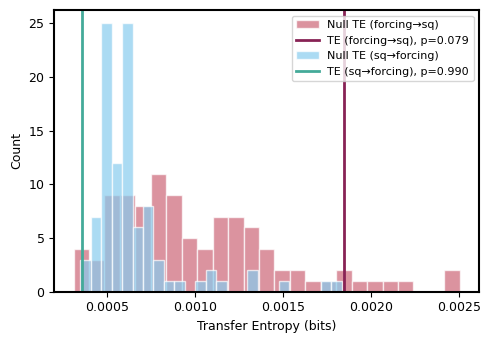

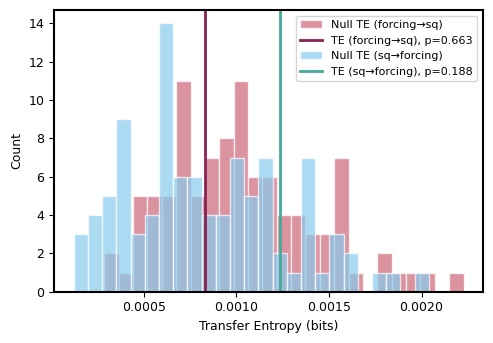

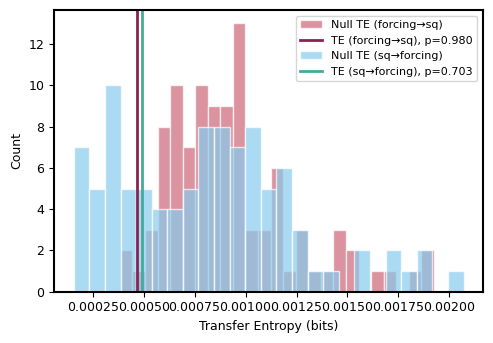

In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)



pre = df_pre['pre'].values      # source (precession)
sq_ch4 = df_ch4['ch4'].values    # target (residual)
sq_d18O = df_d18O['d18O'].values  # target (residual)
sq_dD = df_dD['dD'].values        # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq_ch4, forcing_bins=4, sq_bins=2)
result,fig=sa.transfer_entropy_surrogate_test(pre,sq_d18O, forcing_bins=4, sq_bins=2)
result,fig=sa.transfer_entropy_surrogate_test(pre,sq_dD, forcing_bins=4, sq_bins=2)

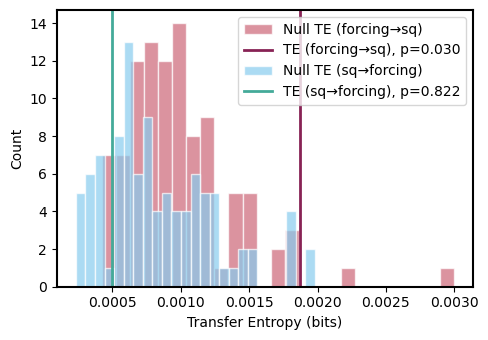

True


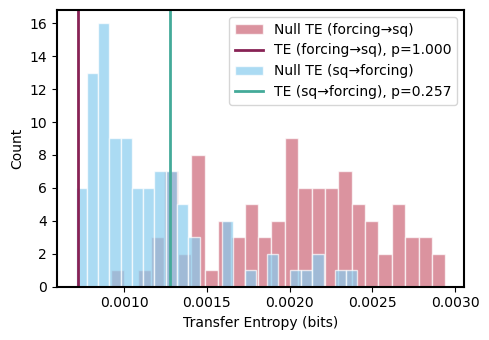

False


In [39]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)



pre = df_pre['pre'].values      # source (precession)
obl = df_obl['obl'].values    # target (obliquity)
sq = df_ch4['ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=4, sq_bins=2, use_quantile=True)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)

result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=7)
print(result)



# LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)